In [3]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

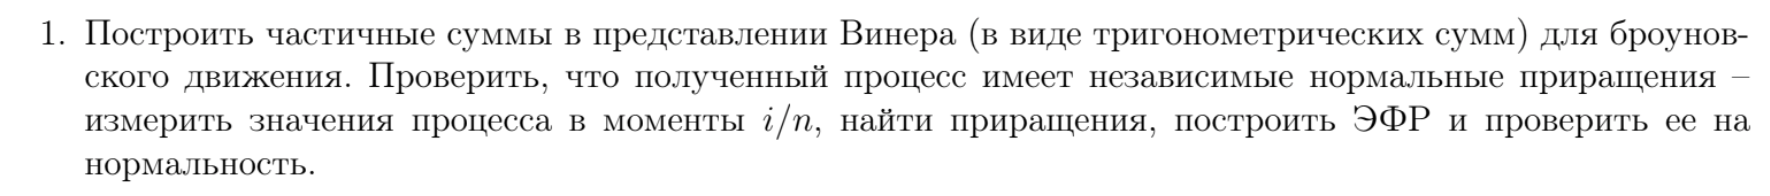

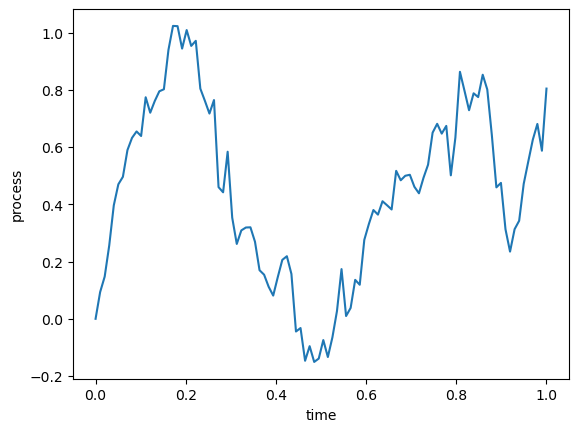

In [2]:
SIZE = 100
def X_t(t, SIZE, ksi_arr):
    c_arr = np.array([np.sqrt(2)*np.sin(np.pi*(n-1/2)*t)/(np.pi * (n-1/2)) for n in range(1, SIZE+1)])
    x_t = (ksi_arr * c_arr).sum()
    return x_t
time = np.linspace(0,1, SIZE)
def get_sample(SIZE, time):
    ksi_arr = sts.norm.rvs(size = SIZE)
    sample = np.vectorize(X_t, excluded = [1,2])(time, SIZE, ksi_arr)
    return sample
sample = get_sample(SIZE, time)
plt.plot(time, sample)
plt.xlabel("time")
plt.ylabel("process")
plt.show()

100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 38.22it/s]


TEST PVALUE: 0.8421645577486377


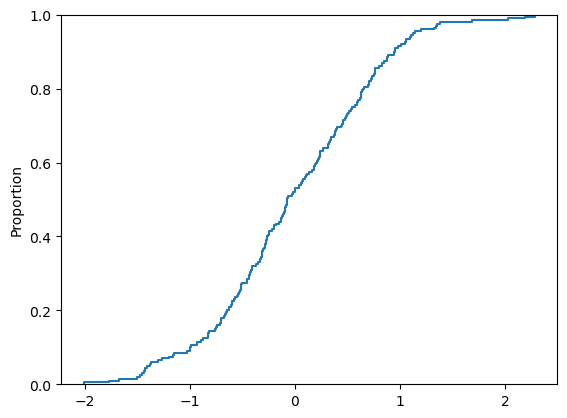

In [3]:
num_trials = 200
data = np.zeros(num_trials)
t = 0.9
s = 0.3
for j in tqdm(range(num_trials)):
    sample = get_sample(SIZE, time)
    a = sample[int(t*SIZE)]
    b = sample[int(s*SIZE)]
    data[j] += a - b
test = sts.kstest(data, 'norm', args=(0,np.sqrt(t-s))).pvalue
print(f"TEST PVALUE: {test}")
sb.ecdfplot(data)
plt.show()

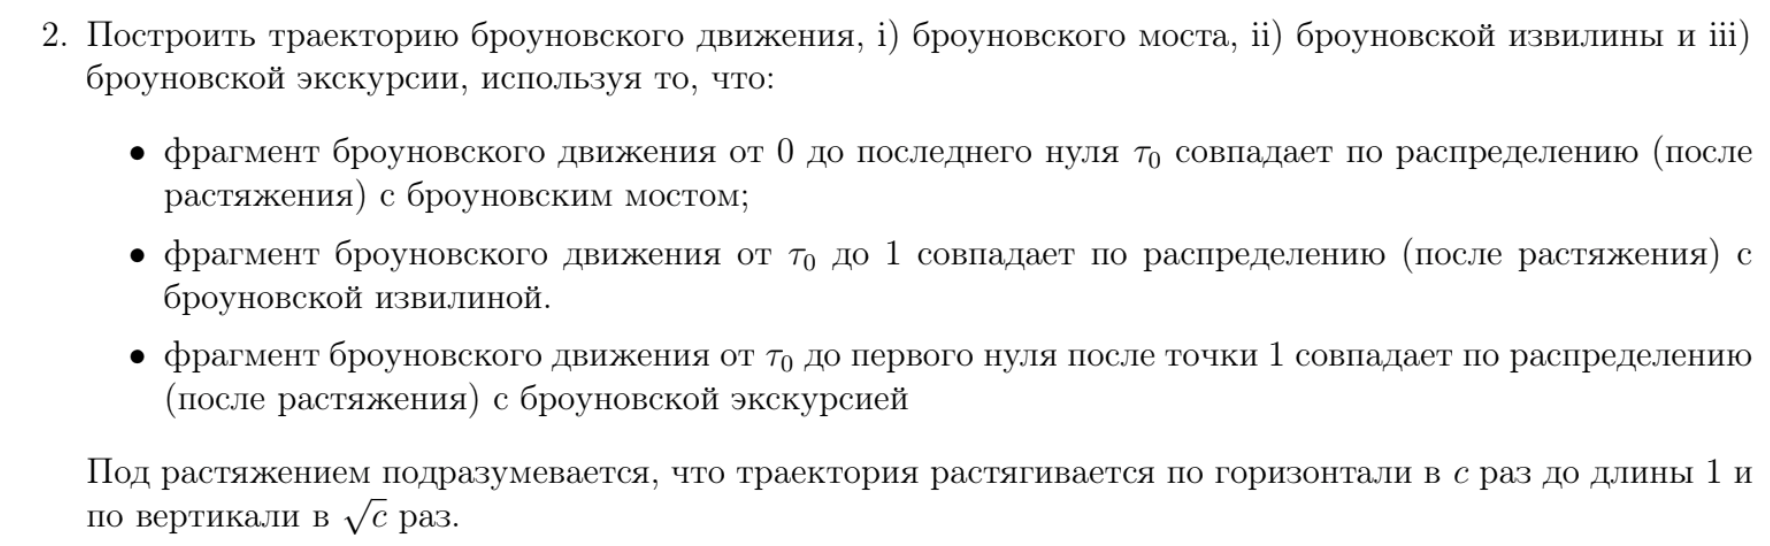

In [4]:
def find_latest_zero(sample, time):
    neg_idx = np.where(sample < 0)[0]
    pos_idx = np.where(sample > 0)[0]
    zero_idx = np.where(sample == 0)[0]
    if len(neg_idx) > 0:
        a = neg_idx[-1]
    else:
        a = len(sample) - 1
    if len(pos_idx) > 0:
        b = pos_idx[-1]
    else:
        b = len(sample) - 1
    
    if len(zero_idx) > 0:
        e = zero_idx[-1]
    else:
        e = 0
    
    k = min(a, b)
    if k < len(sample) - 1:
        d = sample[k]
        c = sample[k + 1]
        key_time = time[k] + 1 / (len(time)*(1 + np.abs(c / d)))
        answer = max(key_time, e)
    else:
        answer = e
    
    return answer  

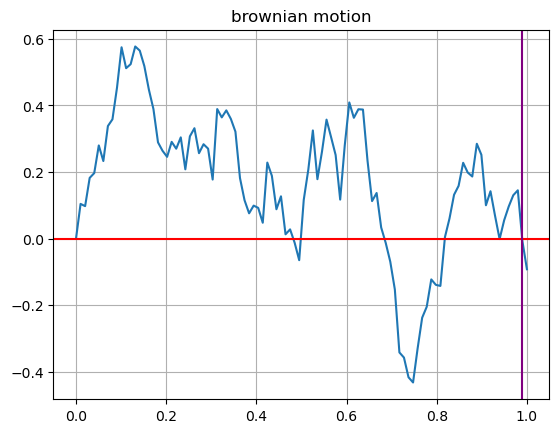

In [5]:
SIZE = 100
time = np.linspace(0,1, SIZE)

sample = get_sample(SIZE, time)

answer = find_latest_zero(sample,time)

plt.title("brownian motion")
plt.plot(time, sample)
plt.axhline(0, c = 'r')
plt.axvline(answer, c = 'purple')

plt.grid()

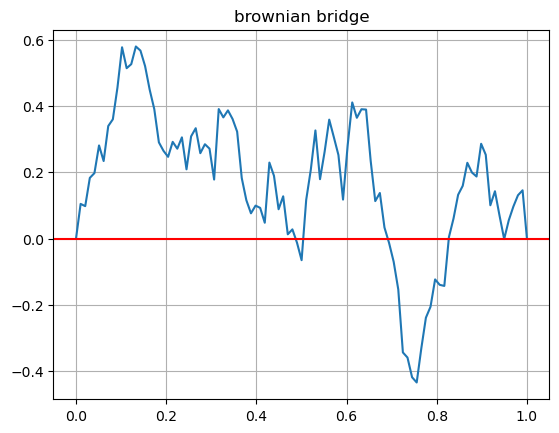

In [6]:
c = 1/answer
key_idx = int(SIZE * answer)
new_t = np.append(time[0:key_idx], answer) * c
new_vals = np.append(sample[0:key_idx], 0) * np.sqrt(c)
plt.title("brownian bridge")
plt.plot(new_t, new_vals)
plt.grid()
plt.axhline(0, c='r')

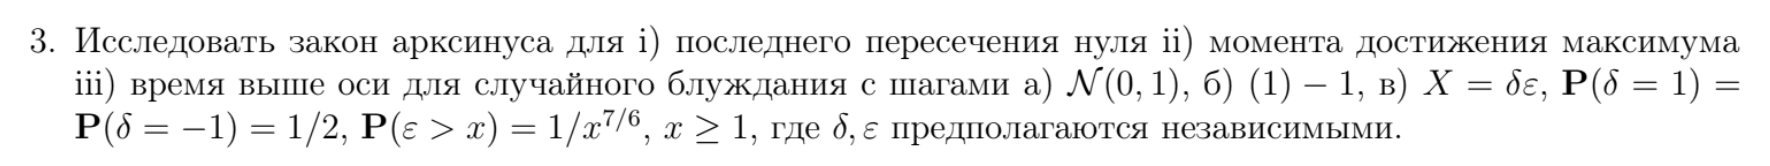

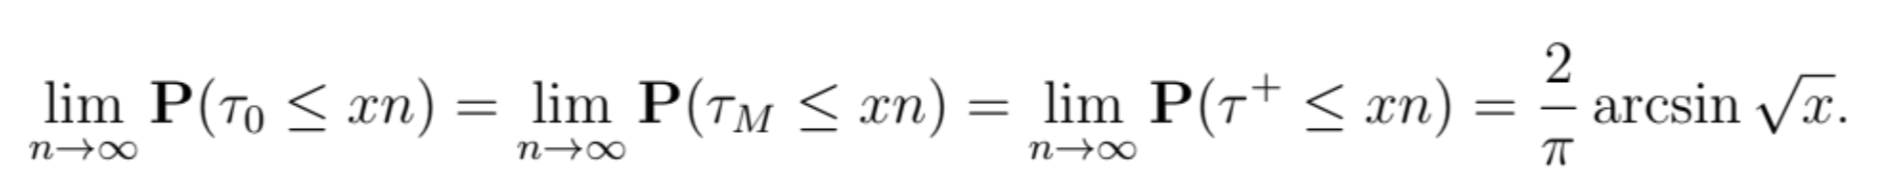

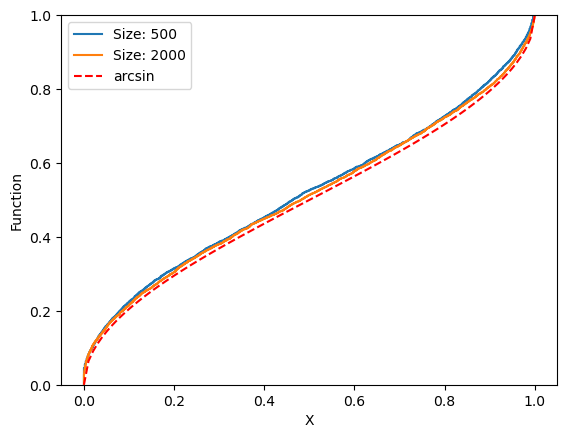

In [7]:
num_trials = 5000
sizes = [500, 2000]
time = np.arange(0,max(sizes))
X_ARR = np.linspace(0, 1, 100)

for size in sizes:
    result = np.zeros(num_trials)
    for j in range (num_trials):
        traj = np.concatenate(([0], np.cumsum(sts.norm.rvs(size=size - 1))))
        value = find_latest_zero(traj,time)/size
        result[j] +=  value
    sb.ecdfplot(result, label = f"Size: {size}")
            
plt.plot(X_ARR, sts.arcsine.cdf(X_ARR), "r--", label = "arcsin")
plt.legend()
plt.xlabel("X")
plt.ylabel("Function")
plt.show()

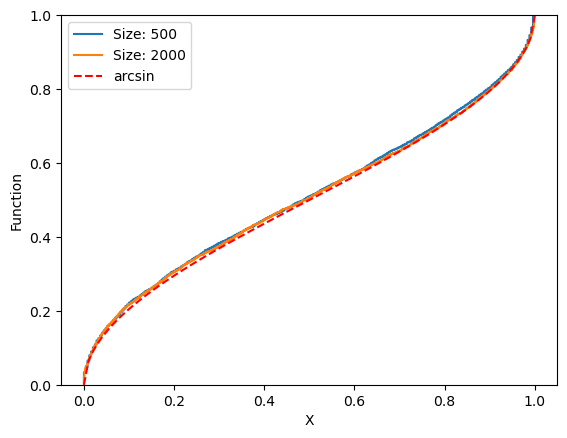

In [8]:
sizes = [500, 2000]
for size in sizes:
    result = np.zeros(num_trials)
    for j in range (num_trials):
        traj = np.concatenate(([0], np.cumsum(np.random.choice([-1,1],size=size-1))))
        value = find_latest_zero(traj,time)/size
        result[j] +=  value
    sb.ecdfplot(result, label = f"Size: {size}")
    
X_ARR = np.linspace(0,1,100)
plt.plot(X_ARR, sts.arcsine.cdf(X_ARR), "r--", label = "arcsin")
plt.legend()
plt.xlabel("X")
plt.ylabel("Function")
plt.show()

In [9]:
### пункт в)
def inverse(q):
    return (1 / (1 - q))**(6/7)
def generate_eps(SIZE):
    x = sts.uniform.rvs(size=SIZE)
    sample = np.vectorize(inverse)(x)
    return sample
def generate_steps(SIZE):
    delta_arr = np.random.choice([-1,1], size=SIZE-1)
    eps_arr = generate_eps(SIZE-1)
    result = np.concatenate(([0], np.cumsum(delta_arr * eps_arr)))
    return result

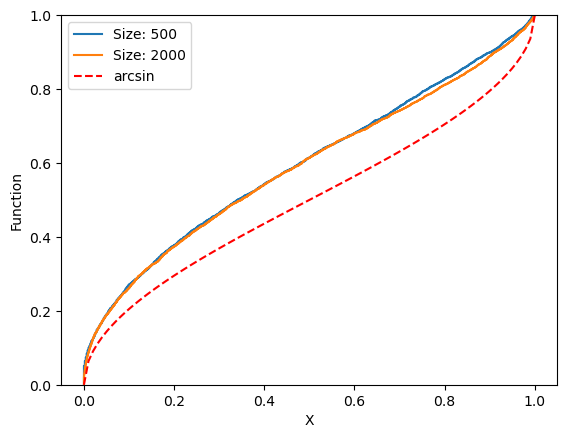

In [10]:
sizes = [500, 2000]

for size in sizes:
    result = np.zeros(num_trials)
    for j in range (num_trials):
        traj = generate_steps(size)
        value = find_latest_zero(traj,time)/size
        result[j] +=  value
    sb.ecdfplot(result, label = f"Size: {size}")

X_ARR = np.linspace(0,1,100)
plt.plot(X_ARR, sts.arcsine.cdf(X_ARR), "r--", label = "arcsin")
plt.legend()
plt.xlabel("X")
plt.ylabel("Function")
plt.show()
# Тут теорема Донскера и не выполняется, дисперсия бесконечная

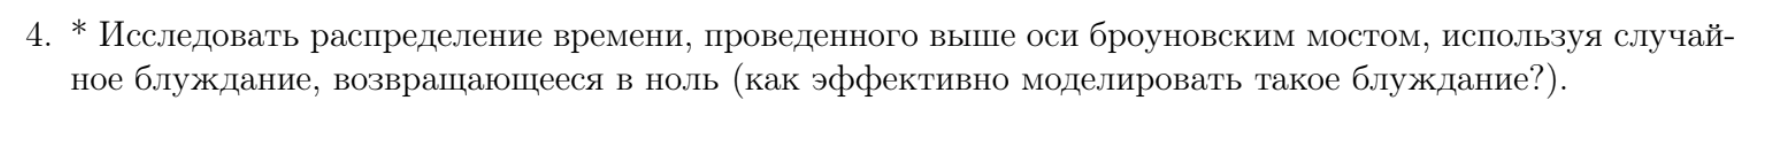

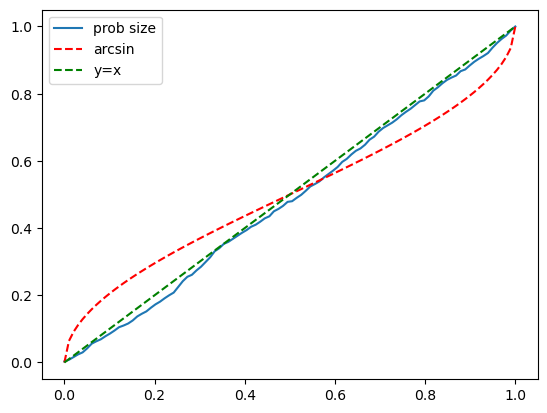

In [11]:
SIZE = 1000
def generate_trajectory(SIZE):
    ones = np.ones(int(SIZE/2))
    array = np.concatenate((ones, -1 * ones))
    np.random.shuffle(array)
    array = np.concatenate(([0], array))
    walk = np.cumsum(array)
    return walk

def calc_time(walk):
    null_args = np.where(walk==0)[0]
    time = 0
    for j in range(len(null_args)-1):
        a = null_args[j]
        b = null_args[j+1]
        starting_position = a
        next_position = b
        test_value = walk[int((b+a)/2)]
        if test_value > 0:
            time += b-a
        else:
            continue
    return time
x_arr = np.linspace(0,1,100)
num_trials = 1000
results = np.zeros(len(x_arr))

# calc_time(1, walk)
for _ in range(num_trials):
    walk = generate_trajectory(SIZE)
    time_spent_above = calc_time(walk)
    

    for k in range(len(x_arr)):
        results[k] += (time_spent_above <= x_arr[k]*SIZE)/num_trials

plt.plot(x_arr, results, label=f"prob size")
plt.plot(x_arr, sts.arcsine.cdf(x_arr), "r--", label = "arcsin")
plt.plot(x_arr, x_arr, "g--", label = "y=x")

plt.legend()